tanh
Loss after iteration 0: 0.432387
Loss after iteration 1000: 0.068947
Loss after iteration 2000: 0.068888
Loss after iteration 3000: 0.070752
Loss after iteration 4000: 0.070748
Loss after iteration 5000: 0.070751
Loss after iteration 6000: 0.070754
Loss after iteration 7000: 0.070756
Loss after iteration 8000: 0.070757
Loss after iteration 9000: 0.070758
Loss after iteration 10000: 0.070758
Loss after iteration 11000: 0.070758
Loss after iteration 12000: 0.070758
Loss after iteration 13000: 0.070758
Loss after iteration 14000: 0.070758
Loss after iteration 15000: 0.070758
Loss after iteration 16000: 0.070758
Loss after iteration 17000: 0.070758
Loss after iteration 18000: 0.070758
Loss after iteration 19000: 0.070758


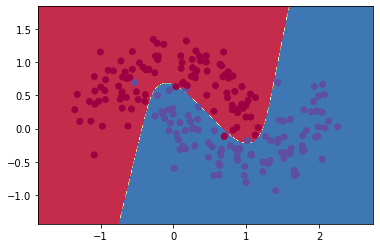

sigmoid
Loss after iteration 0: 0.628571
Loss after iteration 1000: 0.088431
Loss after iteration 2000: 0.079598
Loss after iteration 3000: 0.078604
Loss after iteration 4000: 0.078330
Loss after iteration 5000: 0.078233
Loss after iteration 6000: 0.078192
Loss after iteration 7000: 0.078174
Loss after iteration 8000: 0.078166
Loss after iteration 9000: 0.078161
Loss after iteration 10000: 0.078159
Loss after iteration 11000: 0.078158
Loss after iteration 12000: 0.078157
Loss after iteration 13000: 0.078156
Loss after iteration 14000: 0.078156
Loss after iteration 15000: 0.078156
Loss after iteration 16000: 0.078156
Loss after iteration 17000: 0.078156
Loss after iteration 18000: 0.078156
Loss after iteration 19000: 0.078155


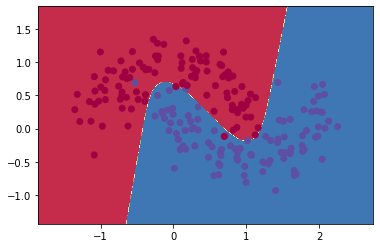

ReLu
Loss after iteration 0: 0.560274
Loss after iteration 1000: 0.072179
Loss after iteration 2000: 0.071301
Loss after iteration 3000: 0.071159
Loss after iteration 4000: 0.071190
Loss after iteration 5000: 0.071136
Loss after iteration 6000: 0.071276
Loss after iteration 7000: 0.071090
Loss after iteration 8000: 0.071265
Loss after iteration 9000: 0.071084
Loss after iteration 10000: 0.071090
Loss after iteration 11000: 0.071087
Loss after iteration 12000: 0.071086
Loss after iteration 13000: 0.071069
Loss after iteration 14000: 0.071114
Loss after iteration 15000: 0.071074
Loss after iteration 16000: 0.071113
Loss after iteration 17000: 0.071071
Loss after iteration 18000: 0.071090
Loss after iteration 19000: 0.071219


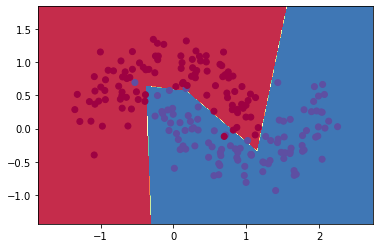

In [2]:
__author__ = 'Catherine Zhu'

import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt


def generate_data():
    '''
    generate data
    :return: X: input data, y: given labels
    '''
    np.random.seed(0)
    X, y = datasets.make_moons(200, noise=0.20)
    return X, y


def plot_decision_boundary(pred_func, X, y):
    '''
    plot the decision boundary
    :param pred_func: function used to predict the label
    :param X: input data
    :param y: given labels
    :return:
    '''
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()


########################################################################################################################
########################################################################################################################
# YOUR ASSSIGMENT STARTS HERE
# FOLLOW THE INSTRUCTION BELOW TO BUILD AND TRAIN A 3-LAYER NEURAL NETWORK
########################################################################################################################
########################################################################################################################
class NeuralNetwork(object):
    """
    This class builds and trains a neural network
    """

    def __init__(self, nn_input_dim, nn_hidden_dim, nn_output_dim, actFun_type='tanh', reg_lambda=0.01, seed=0):
        '''
        :param nn_input_dim: input dimension
        :param nn_hidden_dim: the number of hidden units
        :param nn_output_dim: output dimension
        :param actFun_type: type of activation function. 3 options: 'tanh', 'sigmoid', 'relu'
        :param reg_lambda: regularization coefficient
        :param seed: random seed
        '''
        self.nn_input_dim = nn_input_dim
        self.nn_hidden_dim = nn_hidden_dim
        self.nn_output_dim = nn_output_dim
        self.actFun_type = actFun_type
        self.reg_lambda = reg_lambda

        # initialize the weights and biases in the network
        np.random.seed(seed)
        self.W1 = np.random.randn(self.nn_input_dim, self.nn_hidden_dim) / np.sqrt(self.nn_input_dim)
        self.b1 = np.zeros((1, self.nn_hidden_dim))
        self.W2 = np.random.randn(self.nn_hidden_dim, self.nn_output_dim) / np.sqrt(self.nn_hidden_dim)
        self.b2 = np.zeros((1, self.nn_output_dim))

    def actFun(self, z, type):
        '''
        actFun computes the activation functions
        :param z: net input
        :param type: Tanh, Sigmoid, or ReLU
        :return: activations
        '''

        # YOU IMPLMENT YOUR actFun HERE
        if type == "sigmoid":
            return 1 / (1 + np.exp(-z))
        elif type == "tanh":
            return np.tanh(z)
        elif type == "ReLu":
            return np.maximum(0, z)
        else:
            return "Unknown activation function"

    def diff_actFun(self, z, type):
        '''
        diff_actFun compute the derivatives of the activation functions wrt the net input
        :param z: net input
        :param type: Tanh, Sigmoid, or ReLU
        :return: the derivatives of the activation functions wrt the net input
        '''

        # YOU IMPLEMENT YOUR diff_actFun HERE
        if type == "sigmoid":
            ss = 1 / (1 + np.exp(-z))
            return ss * (1-ss)
        elif type == "tanh":
            return 1 - np.tanh(z) ** 2
        elif type == "ReLu":
            return 1 * (z > 0)
        else:
            return "Unknown derivatives"

    def feedforward(self, X, actFun):
        '''
        feedforward builds a 3-layer neural network and computes the two probabilities,
        one for class 0 and one for class 1
        :param X: input data
        :param actFun: activation function
        :return:
        '''

        # YOU IMPLEMENT YOUR feedforward HERE

        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = actFun(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.probs = np.exp((self.z2 - np.max(self.z2)) - np.sum(self.z2, axis=1, keepdims=True))
        return self.probs

    def calculate_loss(self, X, y):
        '''
        calculate_loss compute the loss for prediction
        :param X: input data
        :param y: given labels
        :return: the loss for prediction
        '''
        num_examples = len(X)
        self.feedforward(X, lambda x: self.actFun(x, type=self.actFun_type))
        # Calculating the loss

        # YOU IMPLEMENT YOUR CALCULATION OF THE LOSS HERE

        probs = np.exp(self.z2)/np.sum(np.exp(self.z2), axis=1, keepdims=True)
        data_loss = np.sum(-np.log(probs[np.arange(num_examples), y]))

        # Add regulatization term to loss (optional)
        data_loss += self.reg_lambda / 2 * (np.sum(np.square(self.W1)) + np.sum(np.square(self.W2)))
        return (1. / num_examples) * data_loss

    def predict(self, X):
        '''
        predict infers the label of a given data point X
        :param X: input data
        :return: label inferred
        '''
        self.feedforward(X, lambda x: self.actFun(x, type=self.actFun_type))
        return np.argmax(self.probs, axis=1)

    def backprop(self, X, y):
        '''
        backprop run backpropagation to compute the gradients used to update the parameters in the backward step
        :param X: input data
        :param y: given labels
        :return: dL/dW1, dL/b1, dL/dW2, dL/db2
        '''

        # IMPLEMENT YOUR BACKPROP HERE
        N = len(X)
        deltaout = np.exp(self.z2)/np.sum(np.exp(self.z2), axis=1, keepdims=True)
        deltaout[np.arange(N), y] -=1

        dW2 = np.dot(self.a1.T, deltaout)
        db2 = np.sum(deltaout, axis=0)

        actFun_derivative = self.diff_actFun(self.z1, type=self.actFun_type)
        delta2 = np.dot(deltaout, self.W2.T) * actFun_derivative

        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)
        return dW1, dW2, db1, db2

    def fit_model(self, X, y, epsilon=0.01, num_passes=20000, print_loss=True):
        '''
        fit_model uses backpropagation to train the network
        :param X: input data
        :param y: given labels
        :param num_passes: the number of times that the algorithm runs through the whole dataset
        :param print_loss: print the loss or not
        :return:
        '''
        # Gradient descent.
        for i in range(0, num_passes):
            # Forward propagation
            self.feedforward(X, lambda x: self.actFun(x, type=self.actFun_type))
            # Backpropagation
            dW1, dW2, db1, db2 = self.backprop(X, y)

            # Add derivatives of regularization terms (b1 and b2 don't have regularization terms)
            dW2 += self.reg_lambda * self.W2
            dW1 += self.reg_lambda * self.W1

            # Gradient descent parameter update
            self.W1 += -epsilon * dW1
            self.b1 += -epsilon * db1
            self.W2 += -epsilon * dW2
            self.b2 += -epsilon * db2

            # Optionally print the loss.
            # This is expensive because it uses the whole dataset, so we don't want to do it too often.
            if print_loss and i % 1000 == 0:
                print("Loss after iteration %i: %f" % (i, self.calculate_loss(X, y)))

    def visualize_decision_boundary(self, X, y):
        '''
        visualize_decision_boundary plot the decision boundary created by the trained network
        :param X: input data
        :param y: given labels
        :return:
        '''
        plot_decision_boundary(lambda x: self.predict(x), X, y)


def main():
    # generate and visualize Make-Moons dataset
    X, y = generate_data()
    # plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap=plt.cm.Spectral)
    # plt.show()
    chosen_functions=['tanh','sigmoid','ReLu']
    for i in chosen_functions:
        print(i)
        model = NeuralNetwork(nn_input_dim=2, nn_hidden_dim=3, nn_output_dim=2, actFun_type=i)
        model.fit_model(X, y)
        model.visualize_decision_boundary(X, y)


if __name__ == "__main__":
    main()

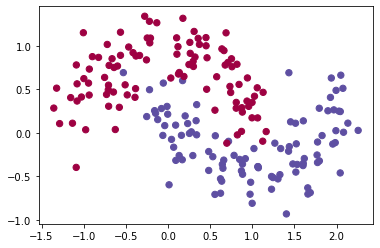

In [ ]:
#generate and visualize Make-Moons dataset
X, y = generate_data()
plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap=plt.cm.Spectral)

nn_hidden_dim: 3
Loss after iteration 0: 0.432387
Loss after iteration 1000: 0.068947
Loss after iteration 2000: 0.068888
Loss after iteration 3000: 0.070752
Loss after iteration 4000: 0.070748
Loss after iteration 5000: 0.070751
Loss after iteration 6000: 0.070754
Loss after iteration 7000: 0.070756
Loss after iteration 8000: 0.070757
Loss after iteration 9000: 0.070758
Loss after iteration 10000: 0.070758
Loss after iteration 11000: 0.070758
Loss after iteration 12000: 0.070758
Loss after iteration 13000: 0.070758
Loss after iteration 14000: 0.070758
Loss after iteration 15000: 0.070758
Loss after iteration 16000: 0.070758
Loss after iteration 17000: 0.070758
Loss after iteration 18000: 0.070758
Loss after iteration 19000: 0.070758


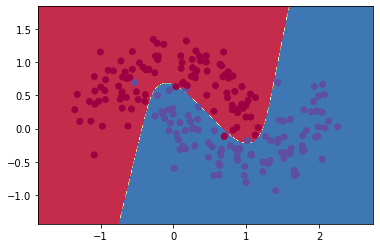

nn_hidden_dim: 5
Loss after iteration 0: 0.613897
Loss after iteration 1000: 0.053880
Loss after iteration 2000: 0.044053
Loss after iteration 3000: 0.041367
Loss after iteration 4000: 0.040268
Loss after iteration 5000: 0.039732
Loss after iteration 6000: 0.039444
Loss after iteration 7000: 0.039280
Loss after iteration 8000: 0.039185
Loss after iteration 9000: 0.039128
Loss after iteration 10000: 0.039093
Loss after iteration 11000: 0.039072
Loss after iteration 12000: 0.039059
Loss after iteration 13000: 0.039050
Loss after iteration 14000: 0.039045
Loss after iteration 15000: 0.039042
Loss after iteration 16000: 0.039040
Loss after iteration 17000: 0.039038
Loss after iteration 18000: 0.039038
Loss after iteration 19000: 0.039037


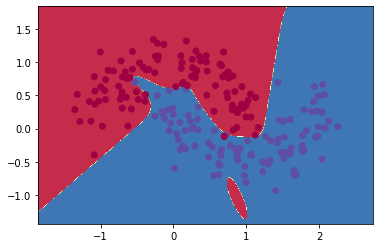

nn_hidden_dim: 7
Loss after iteration 0: 0.403060
Loss after iteration 1000: 0.063391
Loss after iteration 2000: 0.054728
Loss after iteration 3000: 0.049635
Loss after iteration 4000: 0.040169
Loss after iteration 5000: 0.036952
Loss after iteration 6000: 0.034758
Loss after iteration 7000: 0.033396
Loss after iteration 8000: 0.032613
Loss after iteration 9000: 0.032227
Loss after iteration 10000: 0.031993
Loss after iteration 11000: 0.031826
Loss after iteration 12000: 0.031694
Loss after iteration 13000: 0.031580
Loss after iteration 14000: 0.031474
Loss after iteration 15000: 0.031374
Loss after iteration 16000: 0.031276
Loss after iteration 17000: 0.031181
Loss after iteration 18000: 0.031089
Loss after iteration 19000: 0.031004


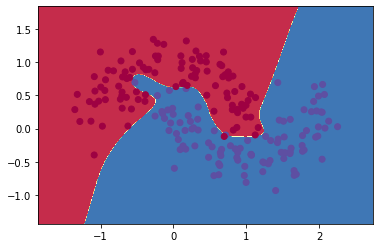

nn_hidden_dim: 9
Loss after iteration 0: 0.998333
Loss after iteration 1000: 0.065305
Loss after iteration 2000: 0.054859
Loss after iteration 3000: 0.051034
Loss after iteration 4000: 0.041923
Loss after iteration 5000: 0.039535
Loss after iteration 6000: 0.034551
Loss after iteration 7000: 0.032715
Loss after iteration 8000: 0.031847
Loss after iteration 9000: 0.031377
Loss after iteration 10000: 0.031084
Loss after iteration 11000: 0.030892
Loss after iteration 12000: 0.030762
Loss after iteration 13000: 0.030669
Loss after iteration 14000: 0.030596
Loss after iteration 15000: 0.030537
Loss after iteration 16000: 0.030487
Loss after iteration 17000: 0.030443
Loss after iteration 18000: 0.030403
Loss after iteration 19000: 0.030366


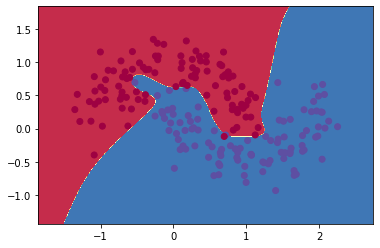

nn_hidden_dim: 11
Loss after iteration 0: 0.618255
Loss after iteration 1000: 0.060744
Loss after iteration 2000: 0.042551
Loss after iteration 3000: 0.037173
Loss after iteration 4000: 0.034938
Loss after iteration 5000: 0.033747
Loss after iteration 6000: 0.032983
Loss after iteration 7000: 0.032434
Loss after iteration 8000: 0.032021
Loss after iteration 9000: 0.031709
Loss after iteration 10000: 0.031468
Loss after iteration 11000: 0.031280
Loss after iteration 12000: 0.031134
Loss after iteration 13000: 0.031027
Loss after iteration 14000: 0.030949
Loss after iteration 15000: 0.030886
Loss after iteration 16000: 0.030830
Loss after iteration 17000: 0.030778
Loss after iteration 18000: 0.030730
Loss after iteration 19000: 0.030684


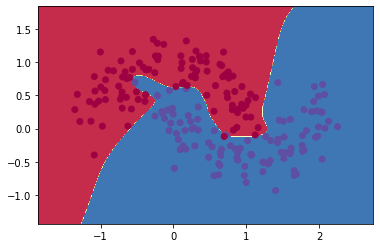

In [6]:

import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt


def generate_data():
    '''
    generate data
    :return: X: input data, y: given labels
    '''
    np.random.seed(0)
    X, y = datasets.make_moons(200, noise=0.20)
    return X, y


def plot_decision_boundary(pred_func, X, y):
    '''
    plot the decision boundary
    :param pred_func: function used to predict the label
    :param X: input data
    :param y: given labels
    :return:
    '''
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()


########################################################################################################################
########################################################################################################################
# YOUR ASSSIGMENT STARTS HERE
# FOLLOW THE INSTRUCTION BELOW TO BUILD AND TRAIN A 3-LAYER NEURAL NETWORK
########################################################################################################################
########################################################################################################################
class NeuralNetwork(object):
    """
    This class builds and trains a neural network
    """

    def __init__(self, nn_input_dim, nn_hidden_dim, nn_output_dim, actFun_type='tanh', reg_lambda=0.01, seed=0):
        '''
        :param nn_input_dim: input dimension
        :param nn_hidden_dim: the number of hidden units
        :param nn_output_dim: output dimension
        :param actFun_type: type of activation function. 3 options: 'tanh', 'sigmoid', 'relu'
        :param reg_lambda: regularization coefficient
        :param seed: random seed
        '''
        self.nn_input_dim = nn_input_dim
        self.nn_hidden_dim = nn_hidden_dim
        self.nn_output_dim = nn_output_dim
        self.actFun_type = actFun_type
        self.reg_lambda = reg_lambda

        # initialize the weights and biases in the network
        np.random.seed(seed)
        self.W1 = np.random.randn(self.nn_input_dim, self.nn_hidden_dim) / np.sqrt(self.nn_input_dim)
        self.b1 = np.zeros((1, self.nn_hidden_dim))
        self.W2 = np.random.randn(self.nn_hidden_dim, self.nn_output_dim) / np.sqrt(self.nn_hidden_dim)
        self.b2 = np.zeros((1, self.nn_output_dim))

    def actFun(self, z, type):
        '''
        actFun computes the activation functions
        :param z: net input
        :param type: Tanh, Sigmoid, or ReLU
        :return: activations
        '''

        # YOU IMPLMENT YOUR actFun HERE
        if type == "sigmoid":
            return 1 / (1 + np.exp(-z))
        elif type == "tanh":
            return np.tanh(z)
        elif type == "ReLu":
            return np.maximum(0, z)
        else:
            return "Unknown activation function"

    def diff_actFun(self, z, type):
        '''
        diff_actFun compute the derivatives of the activation functions wrt the net input
        :param z: net input
        :param type: Tanh, Sigmoid, or ReLU
        :return: the derivatives of the activation functions wrt the net input
        '''

        # YOU IMPLEMENT YOUR diff_actFun HERE
        if type == "sigmoid":
            ss = 1 / (1 + np.exp(-z))
            return ss * (1-ss)
        elif type == "tanh":
            return 1 - np.tanh(z) ** 2
        elif type == "ReLu":
            return 1 * (z > 0)
        else:
            return "Unknown derivatives"

    def feedforward(self, X, actFun):
        '''
        feedforward builds a 3-layer neural network and computes the two probabilities,
        one for class 0 and one for class 1
        :param X: input data
        :param actFun: activation function
        :return:
        '''

        # YOU IMPLEMENT YOUR feedforward HERE

        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = actFun(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.probs = np.exp((self.z2 - np.max(self.z2)) - np.sum(self.z2, axis=1, keepdims=True))
        return self.probs

    def calculate_loss(self, X, y):
        '''
        calculate_loss compute the loss for prediction
        :param X: input data
        :param y: given labels
        :return: the loss for prediction
        '''
        num_examples = len(X)
        self.feedforward(X, lambda x: self.actFun(x, type=self.actFun_type))
        # Calculating the loss

        # YOU IMPLEMENT YOUR CALCULATION OF THE LOSS HERE

        probs = np.exp(self.z2)/np.sum(np.exp(self.z2), axis=1, keepdims=True)
        data_loss = np.sum(-np.log(probs[np.arange(num_examples), y]))

        # Add regulatization term to loss (optional)
        data_loss += self.reg_lambda / 2 * (np.sum(np.square(self.W1)) + np.sum(np.square(self.W2)))
        return (1. / num_examples) * data_loss

    def predict(self, X):
        '''
        predict infers the label of a given data point X
        :param X: input data
        :return: label inferred
        '''
        self.feedforward(X, lambda x: self.actFun(x, type=self.actFun_type))
        return np.argmax(self.probs, axis=1)

    def backprop(self, X, y):
        '''
        backprop run backpropagation to compute the gradients used to update the parameters in the backward step
        :param X: input data
        :param y: given labels
        :return: dL/dW1, dL/b1, dL/dW2, dL/db2
        '''

        # IMPLEMENT YOUR BACKPROP HERE
        N = len(X)
        deltaout = np.exp(self.z2)/np.sum(np.exp(self.z2), axis=1, keepdims=True)
        deltaout[np.arange(N), y] -=1
        dW2 = np.dot(self.a1.T, deltaout)
        db2 = np.sum(deltaout, axis=0)

        actFun_derivative = self.diff_actFun(self.z1, type=self.actFun_type)
        delta2 = np.dot(deltaout, self.W2.T) * actFun_derivative

        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)
        return dW1, dW2, db1, db2

    def fit_model(self, X, y, epsilon=0.01, num_passes=20000, print_loss=True):
        '''
        fit_model uses backpropagation to train the network
        :param X: input data
        :param y: given labels
        :param num_passes: the number of times that the algorithm runs through the whole dataset
        :param print_loss: print the loss or not
        :return:
        '''
        # Gradient descent.
        for i in range(0, num_passes):
            # Forward propagation
            self.feedforward(X, lambda x: self.actFun(x, type=self.actFun_type))
            # Backpropagation
            dW1, dW2, db1, db2 = self.backprop(X, y)

            # Add derivatives of regularization terms (b1 and b2 don't have regularization terms)
            dW2 += self.reg_lambda * self.W2
            dW1 += self.reg_lambda * self.W1

            # Gradient descent parameter update
            self.W1 += -epsilon * dW1
            self.b1 += -epsilon * db1
            self.W2 += -epsilon * dW2
            self.b2 += -epsilon * db2

            # Optionally print the loss.
            # This is expensive because it uses the whole dataset, so we don't want to do it too often.
            if print_loss and i % 1000 == 0:
                print("Loss after iteration %i: %f" % (i, self.calculate_loss(X, y)))

    def visualize_decision_boundary(self, X, y):
        '''
        visualize_decision_boundary plot the decision boundary created by the trained network
        :param X: input data
        :param y: given labels
        :return:
        '''
        plot_decision_boundary(lambda x: self.predict(x), X, y)


def main():
    # generate and visualize Make-Moons dataset
    X, y = generate_data()
    # plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap=plt.cm.Spectral)
    # plt.show()
    a = [3,5,7,9,11]
    for i in a:
        print ("nn_hidden_dim: " + str(i))
        model = NeuralNetwork(nn_input_dim=2, nn_hidden_dim=i, nn_output_dim=2, actFun_type='tanh')
        model.fit_model(X, y)
        model.visualize_decision_boundary(X, y)


if __name__ == "__main__":
    main()